In [2]:
import zipfile
import pandas as pd
from pathlib import Path

# مسیر فایل zip
zip_path = Path(r"C:\Users\Tayebe\works\learning_skills\portfolio-analytics\data\titanic\archive.zip")

# فایل رو باز کن
with zipfile.ZipFile(zip_path, "r") as z:
    print(z.namelist())  # لیست فایل‌های داخل zip
    # فایل CSV رو بخون
    with z.open("train.csv") as f:
        df = pd.read_csv(f)

df.head()


['test.csv', 'train.csv']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# خلاصه آماری (میانگین، انحراف معیار، ...)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# تعداد داده‌های گمشده در هر ستون
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# تعداد بازماندگان و قربانیان بر اساس جنسیت
df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

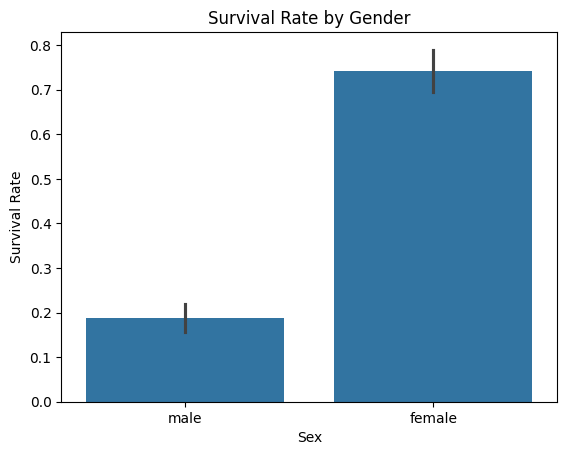

In [6]:
# نمودار نرخ بقا بر اساس جنسیت
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()


In [7]:
# میانگین بقا در هر کلاس (۱،۲،۳)
df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

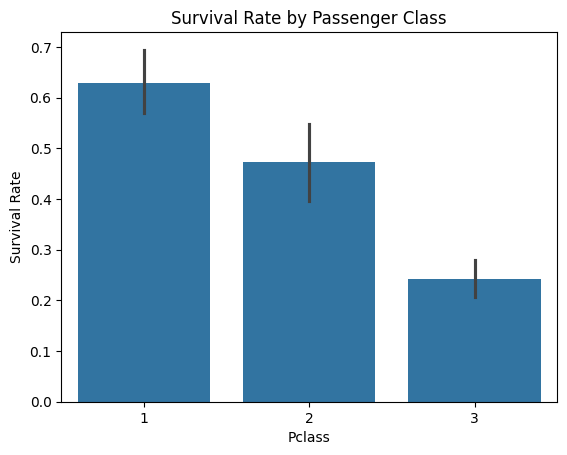

In [8]:
# نمودار
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

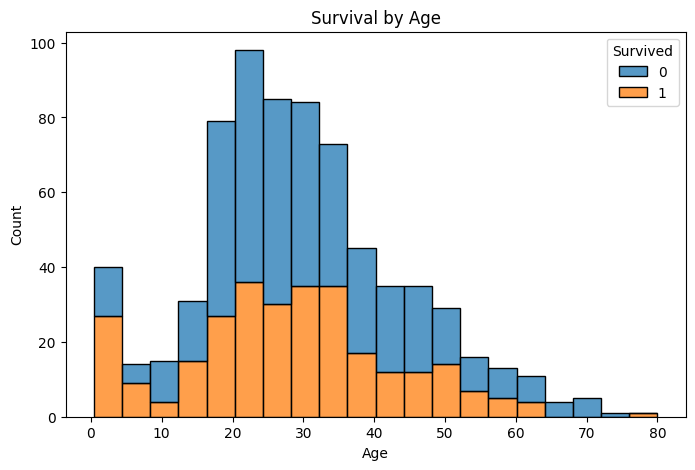

In [9]:
# هیستوگرام سن برای مقایسه بازمانده‌ها و قربانیان
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=20)
plt.title("Survival by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


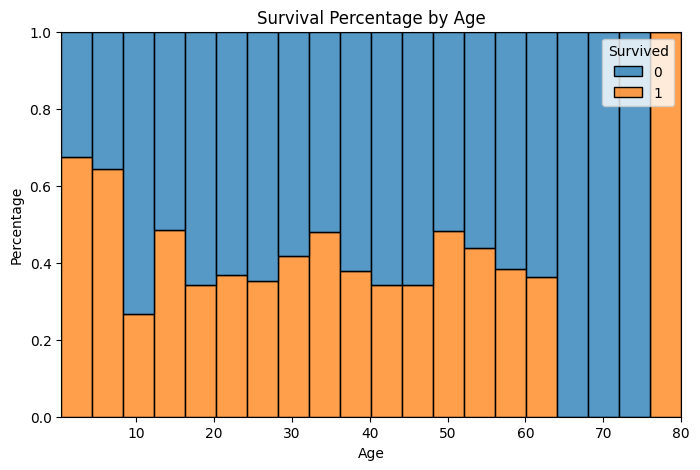

In [10]:
# هیستوگرام درصد بقا بر اساس سن
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Survived", multiple="fill", bins=20, stat="percent")
plt.title("Survival Percentage by Age")
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.show()


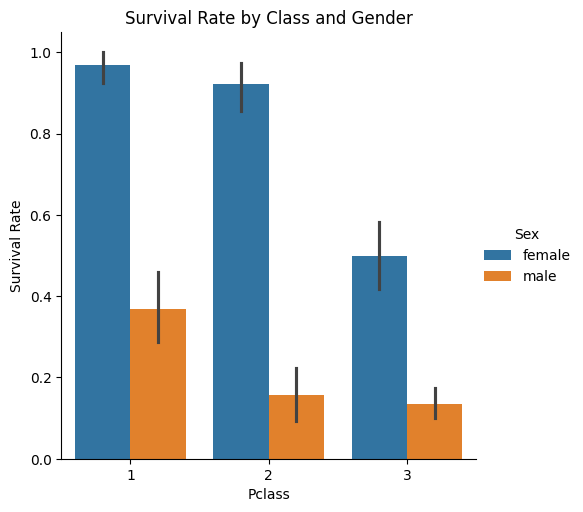

In [11]:
# نمودار نرخ بقا بر اساس جنسیت + کلاس
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=df)
plt.title("Survival Rate by Class and Gender")
plt.ylabel("Survival Rate")
plt.show()


C:\Users\Tayebe\AppData\Local\Temp\ipykernel_22040\3488068849.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Tayebe\AppData\Local\Temp\ipykernel_22040\3488068849.py:32: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  plt.savefig("../outputs/titanic_gender_survival.png", dpi=300, bbox_inches="tight")
c:\Users\Tayebe\works\learning_skills\portfolio-analytics\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


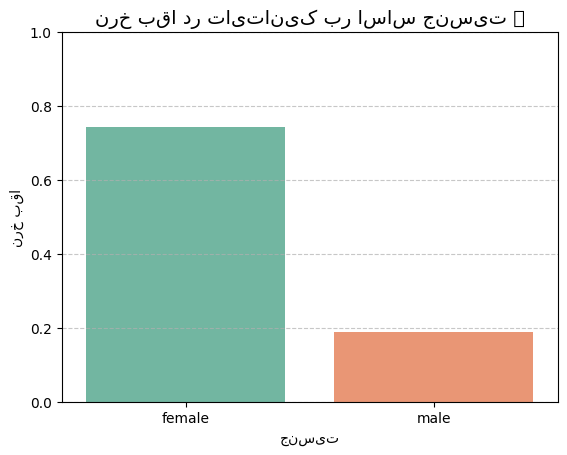

In [12]:
# 📌 این کد نرخ بقا در تایتانیک رو بر اساس جنسیت محاسبه و مصورسازی می‌کنه

import seaborn as sns  # برای رسم نمودار
import pandas as pd    # برای کار با داده‌ها
import matplotlib.pyplot as plt  # برای کنترل رسم نمودار

# 1. 📥 دیتاست آماده تایتانیک رو از seaborn لود می‌کنیم
titanic = sns.load_dataset("titanic")

# 2. 🧹 فقط ستون‌های مورد نیاز رو نگه می‌داریم
data = titanic[["sex", "survived"]]

# 3. 📊 میانگین نرخ بقا (survived = 1) رو برای هر جنسیت حساب می‌کنیم
survival_rate = data.groupby("sex")["survived"].mean().reset_index()

# 4. 🎨 نمودار میله‌ای می‌کشیم
sns.barplot(
    data=survival_rate,
    x="sex", 
    y="survived",
    palette="Set2"  # رنگ‌بندی زیبا
)

# 5. 🖌️ ظاهر نمودار رو بهتر می‌کنیم
plt.title("نرخ بقا در تایتانیک بر اساس جنسیت 🚢", fontsize=14)
plt.ylabel("نرخ بقا")
plt.xlabel("جنسیت")
plt.ylim(0, 1)  # چون نرخ بین 0 تا 1 هست
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 6. 💾 ذخیره خروجی برای پست
plt.savefig("../outputs/titanic_gender_survival.png", dpi=300, bbox_inches="tight")
plt.show()
